In [24]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import*
from Implementations import *
from Plot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [15]:
#DATA_TRAIN_PATH = '../../data/train.csv/train.csv' # TODO: download train data and supply path here
DATA_TRAIN_PATH = '../Projet_1_data/train.csv'
y_train, tX_train, ids_train = load_csv_data(DATA_TRAIN_PATH)

Load test data to co a common pre-processing.

In [16]:
#DATA_TEST_PATH = '../../data/test.csv/test.csv' # TODO: download train data and supply path here 
DATA_TEST_PATH = '../Projet_1_data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Data visualization
### Raw dataset

Features visualization (raw dataset)


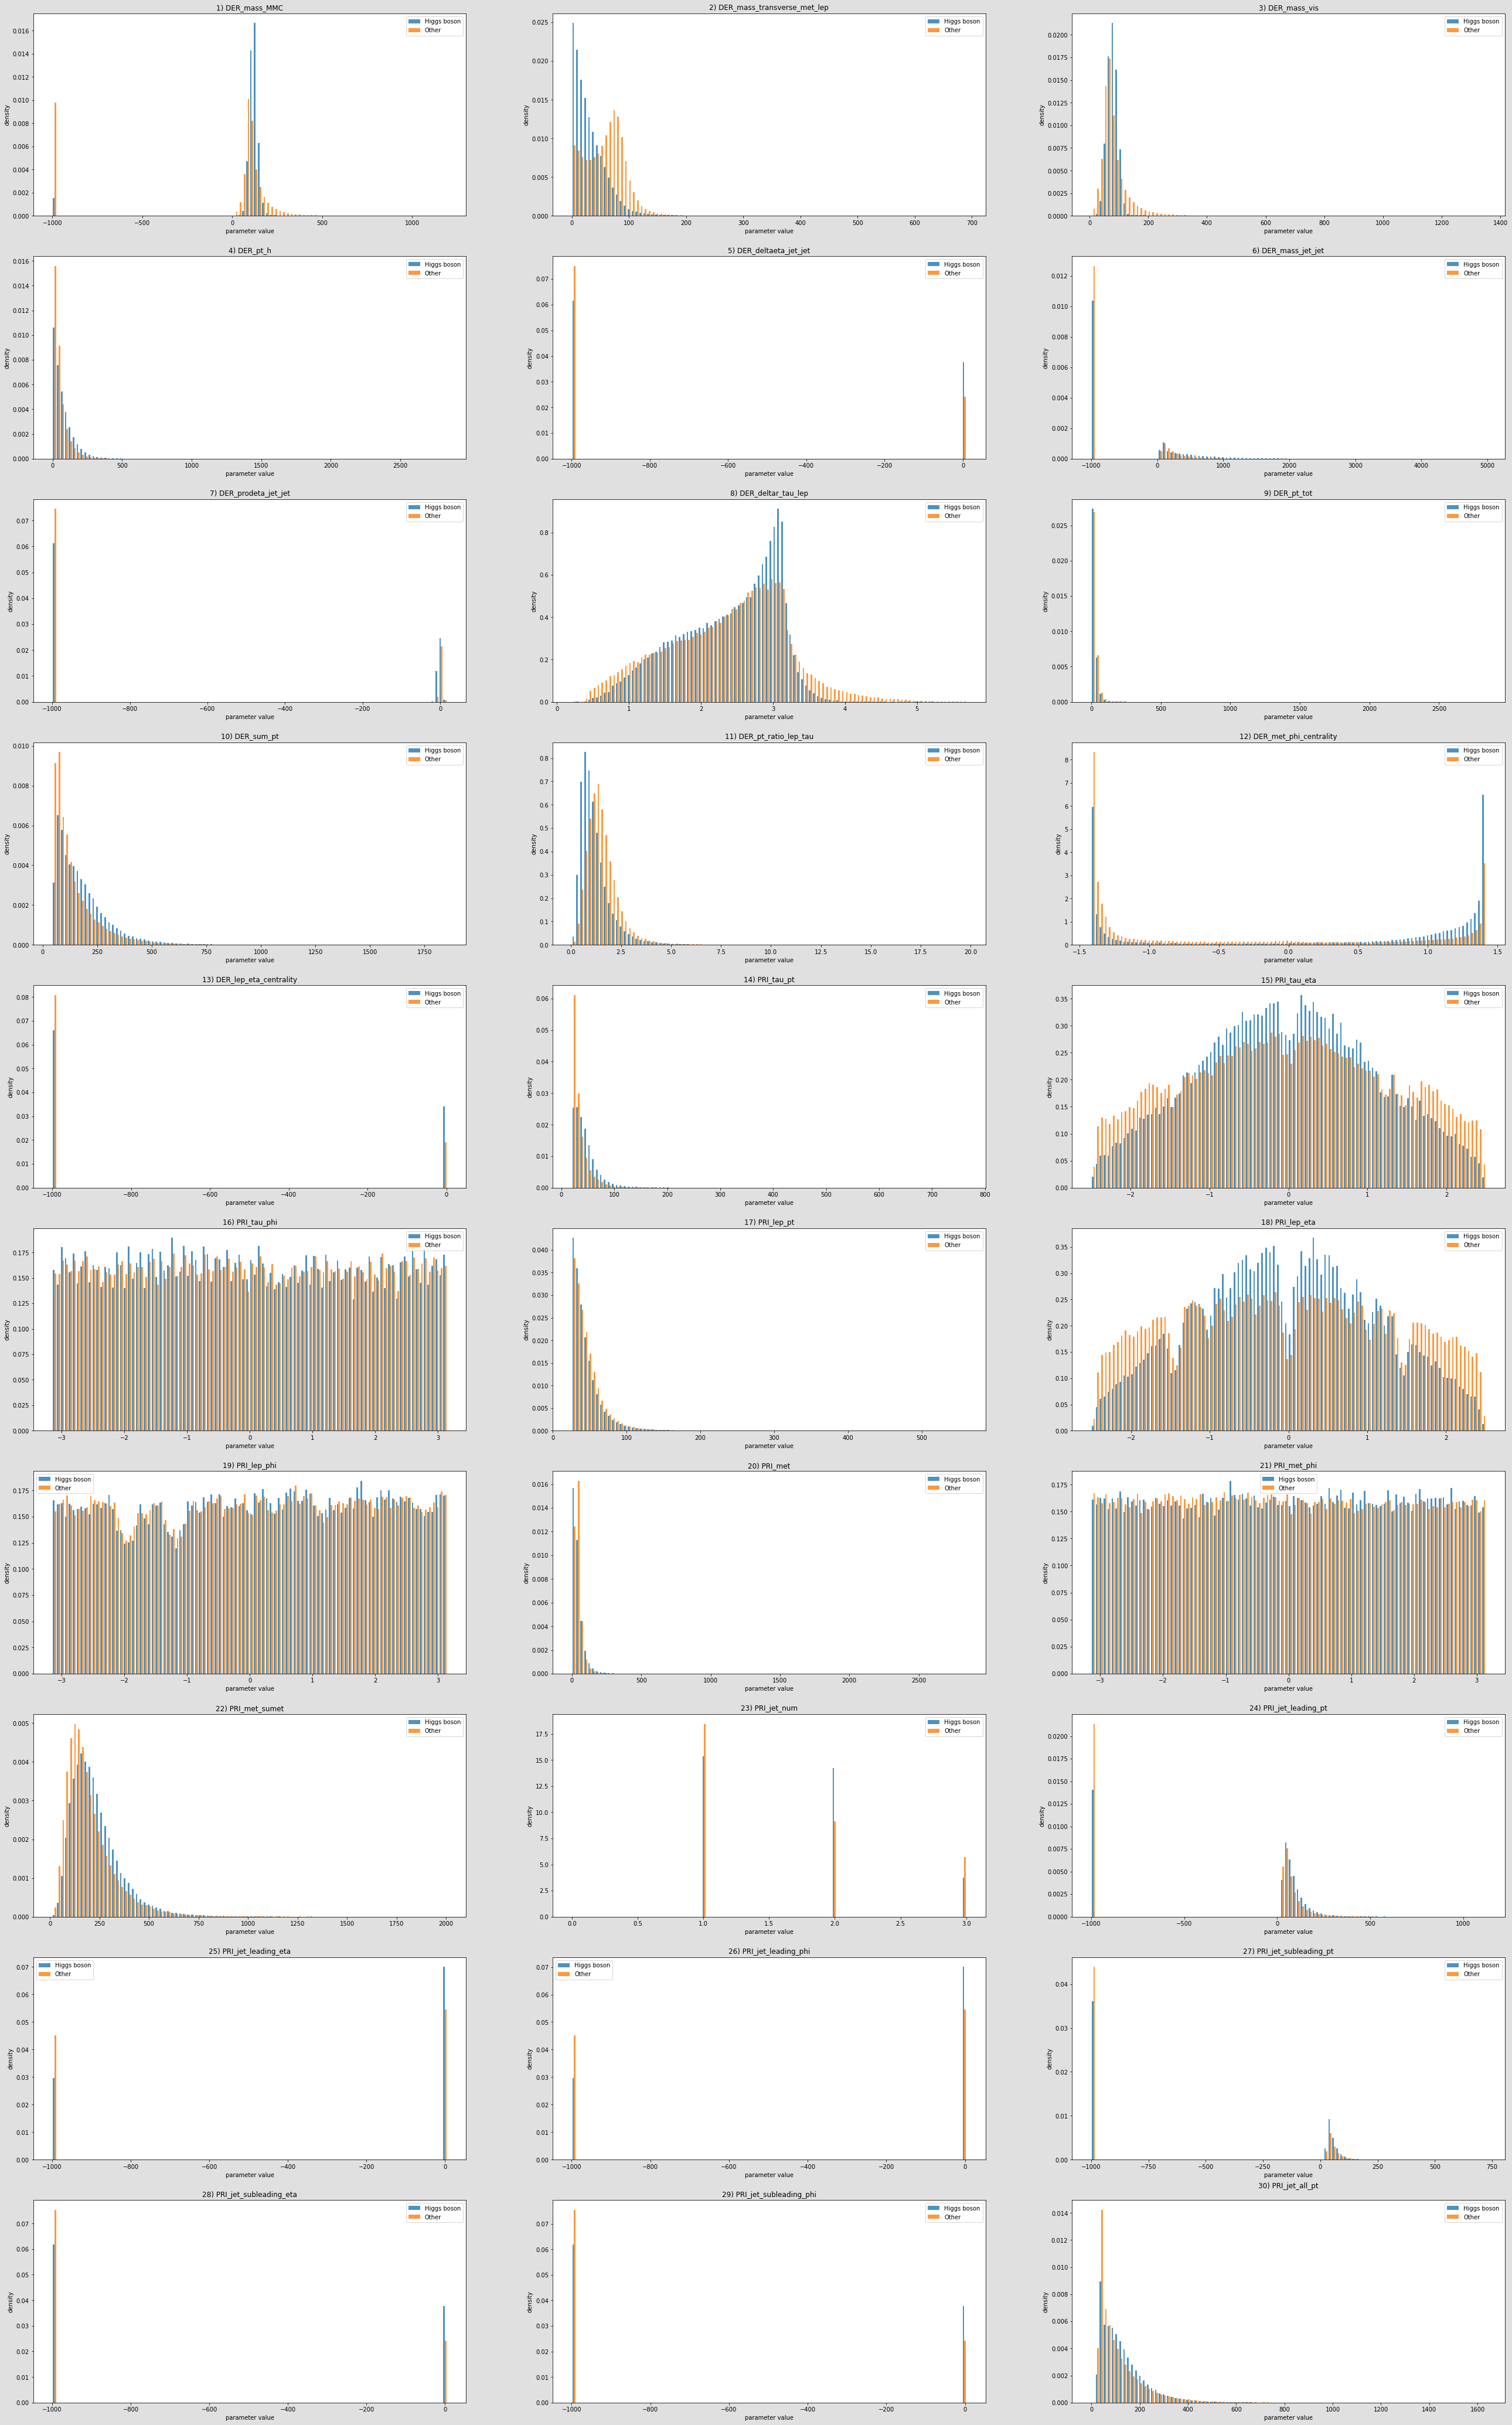

0

In [35]:
with open(DATA_TRAIN_PATH, mode='r') as f:
    param_names = np.array(f.readline().split(',')[2:])
print("Features visualization (raw dataset)")
plot_features_visualization(y_train, tX_train, names=param_names)

### Preprocessed dataset

Features visualization (preprocessed dataset)


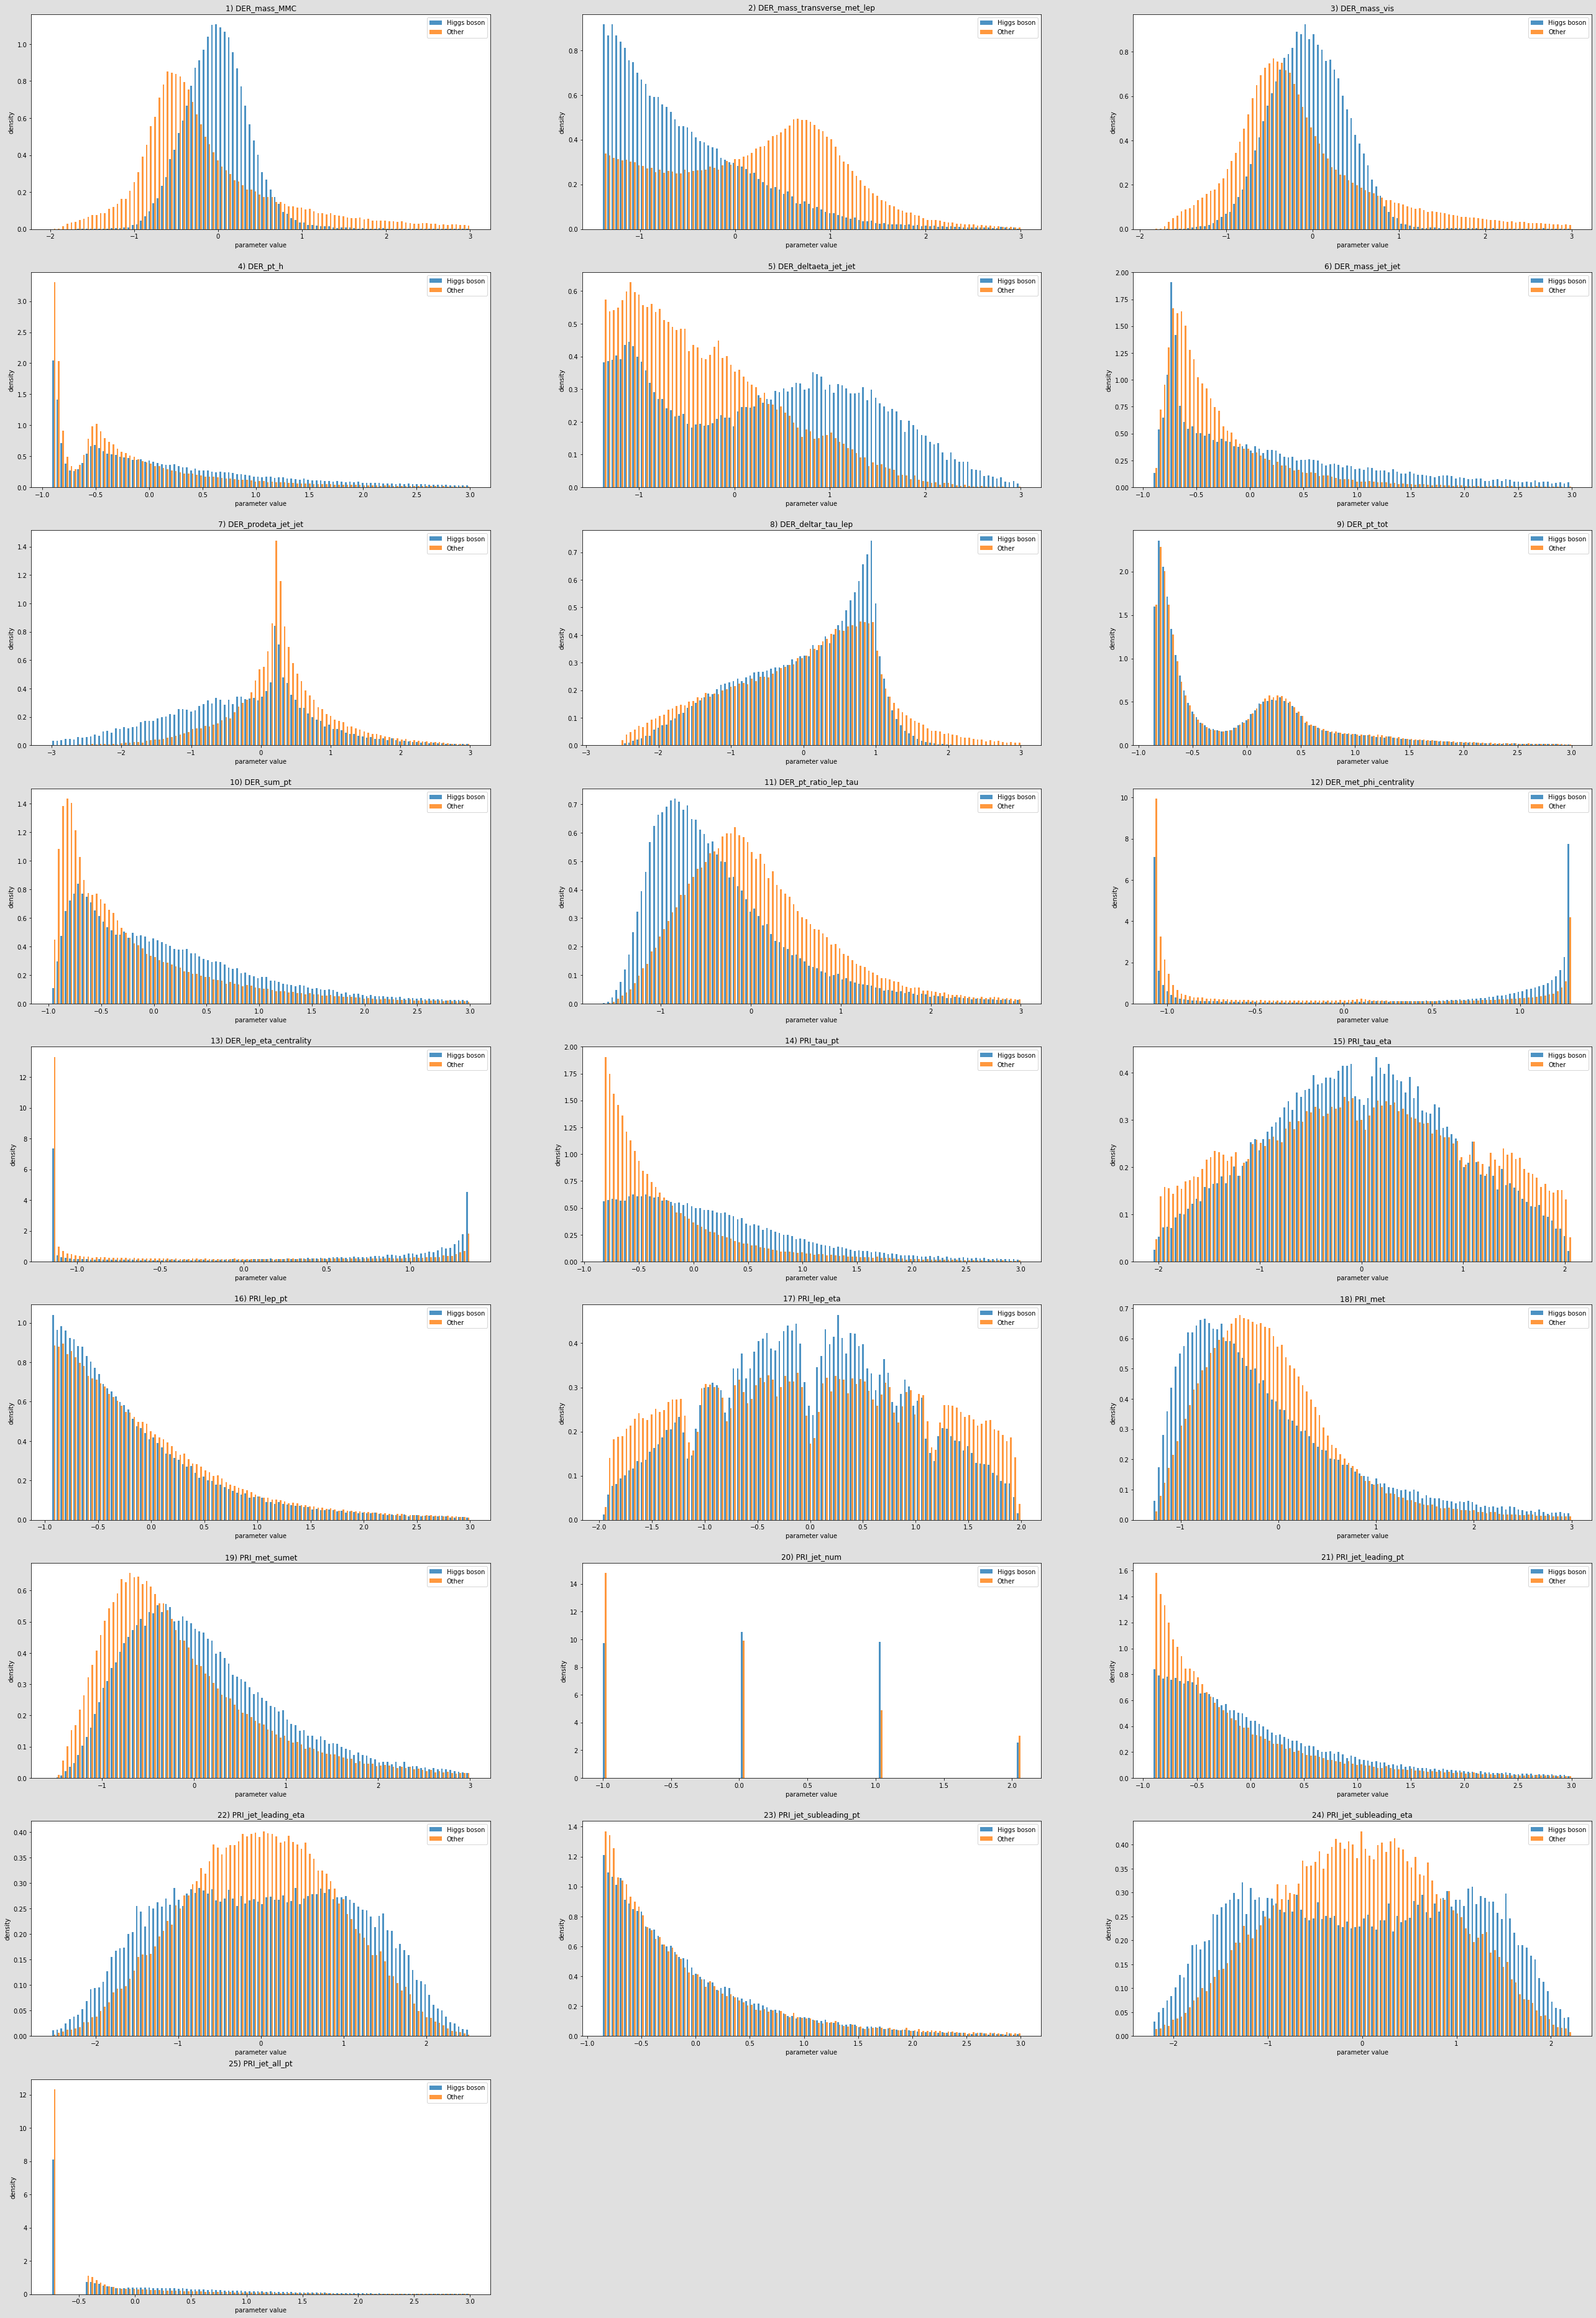

0

In [38]:
y_dv1, tX_dv1, _, _, _ = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Degree_poly':1})
param_names_dv = np.delete(param_names, [15,18,20,25,28]) # parameters removed in preprocess
print("Features visualization (preprocessed dataset)")
plot_features_visualization(y_dv1, tX_dv1[:,1:], names=param_names_dv)

# TRAINING MODELS

### Setting global variables:

In [77]:
y_tr, tX_tr, ids_tr, tX_te, ids_te = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Build_poly': False})
seed = 1
k_fold = 5
k_indices = build_k_indices(y_tr, k_fold, seed)

# Least squares

Preprocessing and parameters definition for optimization

In [78]:
model = 'least_squares'
degrees = np.arange(1,16,1)

Parameters optimization

In [79]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params = None, seed = seed, feedback = True)

Optimizing degree 13/15, model: least_squares, arguments: None
Optimizing degree 14/15, model: least_squares, arguments: None


KeyboardInterrupt: 

Here we optimized over degrees only, so we plot degree vs accuracy

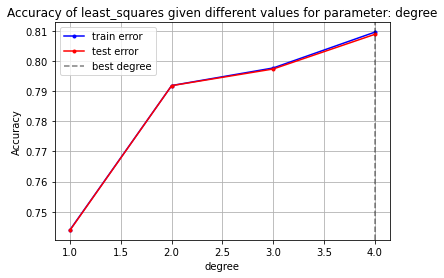

In [38]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = True, img_name = 'least_squares_accuracy')

Plot on MSE gave aberrant values, which illustrates that this loss is not appropriate for categorization, and gets out of hand. We use accuracy for model selection and performance assessment.

Manually choose best parameters

In [39]:
best_degree = 10

Compute performance on k splits with best parameters

In [40]:
model = 'least_squares'
params = None

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/2 for least_squares, extended feature of degree 4 and arguments : None
Starting cross-validation 2/2 for least_squares, extended feature of degree 4 and arguments : None


In [31]:
print('Mean accuracy of best least squares model: ', round(np.mean(accs_te),3))

Mean accuracy of best least squares model:  0.814


Store values for comparison with other models later

In [41]:
np.save('best_models_perf/best_accs_' + model, accs_te)

# Least Squares GD 

Preprocessing and parameters definition for optimization

In [42]:
model = 'least_squares_GD'
degrees = np.arange(1,7,1)
max_iters = 50
params = {'max_iters' : max_iters}

Parameters optimization

In [28]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params = params, seed = seed, feedback = True)

None
Optimizing degree 1/15, model: least_squares_GD, arguments: {'max_iters': 100}
Gradient Descent(0/99): loss =0.5, w0=-0.10000000000000002, w1=0.10000000000000002
Gradient Descent(1/99): loss =0.483255048656341, w0=-0.15638754543867078, w1=0.0022675697389240024
Gradient Descent(2/99): loss =0.4527426715262931, w0=-0.19473431432998656, w1=-0.018317043848454593
Gradient Descent(3/99): loss =0.3905335196117481, w0=-0.22245075695700134, w1=0.043398214905318894
Gradient Descent(4/99): loss =0.37138664279698524, w0=-0.2432659983158094, w1=-0.037970341804291055
Gradient Descent(5/99): loss =0.36226042999252694, w0=-0.2590358828020507, w1=0.006775484886061903
Gradient Descent(6/99): loss =0.3584686667199764, w0=-0.2711452021887987, w1=-0.020793785388985055
Gradient Descent(7/99): loss =0.35489192842399936, w0=-0.28049025052362075, w1=-0.007925784848262254
Gradient Descent(8/99): loss =0.3516845703374562, w0=-0.2877083679934033, w1=-0.014253620824273356
Gradient Descent(9/99): loss =0.34968

Here we optimized over degrees only, so we plot degree vs accuracy

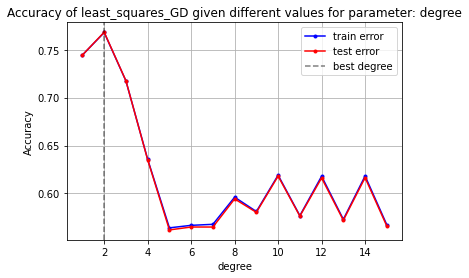

In [30]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = True, img_name = 'least_squares_GD_accuracy')

In [33]:
print(losses_te, losses_te.shape)

[3.40521213e-01 3.97291331e-01 3.84215119e+01 6.89254943e+04
 4.67730754e+08 2.97067822e+11 1.33935490e+12 4.24062353e+13
 1.35801287e+16 5.49291875e+25 5.30340075e+27 2.44442492e+29
 8.53989943e+30 2.54002022e+32 5.04069403e+33] (15,)


Manually choose best parameters

In [43]:
best_degree = 2

Compute performance on k splits with best parameters

Starting cross-validation 1/2 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 100, 'plot': True}
Gradient Descent(0/99): loss =0.5, w0=-0.1, w1=0.1
Gradient Descent(20/99): loss =0.3045, w0=-0.0237, w1=0.2223
Gradient Descent(40/99): loss =0.3026, w0=-0.0372, w1=0.2548
Gradient Descent(60/99): loss =0.3021, w0=-0.0504, w1=0.2607
Gradient Descent(80/99): loss =0.3018, w0=-0.0626, w1=0.2612
Starting cross-validation 2/2 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 100, 'plot': True}
Gradient Descent(0/99): loss =0.5, w0=-0.1, w1=0.1
Gradient Descent(20/99): loss =0.304, w0=-0.0235, w1=0.2212
Gradient Descent(40/99): loss =0.3022, w0=-0.037, w1=0.2557
Gradient Descent(60/99): loss =0.3017, w0=-0.0503, w1=0.2628
Gradient Descent(80/99): loss =0.3015, w0=-0.0627, w1=0.2641


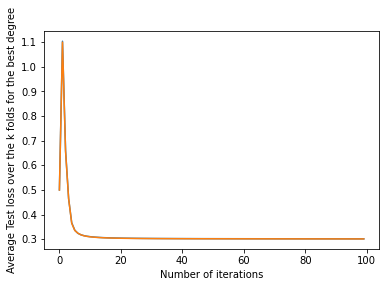

In [44]:
model = 'least_squares_GD'
max_iters = 50
params = {'max_iters':max_iters, 'plot':True}


accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

In [45]:
print('Mean accuracy of best least squares gradient descent model: ', round(np.mean(accs_te),3))

Mean accuracy of best least squares gradient descent model:  0.792
Mean loss of best least squares gradient descent model:  0.302


Store values for comparison with other models later

In [46]:
np.save('best_models_perf/best_accs_' + model, accs_te)

# Least squares SGD

Preprocessing and parameters definition for optimization

In [47]:
model = 'least_squares_SGD'
degrees = np.arange(1,7,1)
max_iters = 1000
batch_size = 1
plot = False
params = {'max_iters':max_iters, 'batch_size':batch_size, 'plot':plot}

In [85]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params=params, seed = seed, feedback = True)

Optimizing degree 2/10, model: least_squares_SGD, arguments: {'max_iters': 50, 'batch_size': 1, 'plot': False}


C:\Users\camil\Documents\GitHub\ml-project-1-jaggifanclub\Secondary.py:19: RuntimeWarning: divide by zero encountered in true_divide
  gamma=gamma_zero*(1/np.sqrt(h))
C:\Users\camil\Documents\GitHub\ml-project-1-jaggifanclub\Implementations.py:45: RuntimeWarning: invalid value encountered in multiply
  if n_iter%20==0:


Gradient Descent(0/49): loss =0.5, w0=0.01, w1=-0.01
Gradient Descent(20/49): loss =nan, w0=nan, w1=nan
Gradient Descent(40/49): loss =nan, w0=nan, w1=nan
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=-0.01
Gradient Descent(20/49): loss =0.2926, w0=-0.0397, w1=-0.0085
Gradient Descent(40/49): loss =0.5496, w0=-0.0273, w1=-0.0043
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=0.01
Gradient Descent(20/49): loss =nan, w0=nan, w1=nan
Gradient Descent(40/49): loss =nan, w0=nan, w1=nan
Gradient Descent(0/49): loss =0.5, w0=0.01, w1=0.01
Gradient Descent(20/49): loss =nan, w0=nan, w1=nan
Gradient Descent(40/49): loss =nan, w0=nan, w1=nan
Optimizing degree 3/10, model: least_squares_SGD, arguments: {'max_iters': 50, 'batch_size': 1, 'plot': False}
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=0.01
Gradient Descent(20/49): loss =nan, w0=nan, w1=nan
Gradient Descent(40/49): loss =nan, w0=nan, w1=nan
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=-0.01
Gradient Descent(20/49): loss =nan, w0

Here we optimized over degrees only, so we plot degree vs accuracy

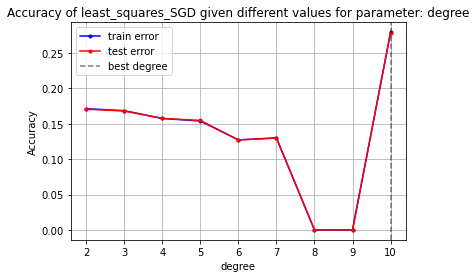

In [86]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = True, img_name = 'least_squares_SGD_batch_size_1_accuracy')

Manually choose best parameters

In [48]:
best_degree = 2

Compute performance on k splits with best parameters

Starting cross-validation 1/2 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 50, 'batch_size': 1, 'plot': True}


C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Secondary.py:81: RuntimeWarning: divide by zero encountered in true_divide
  gamma=gamma_zero*(1/np.sqrt(h))
C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Implementations.py:47: RuntimeWarning: invalid value encountered in multiply
  w = w - gamma * stoch_gradient


Gradient Descent(0/49): loss =0.5, w0=0.01, w1=0.01
Gradient Descent(20/49): loss =nan, w0=nan, w1=nan
Gradient Descent(40/49): loss =nan, w0=nan, w1=nan
Starting cross-validation 2/2 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 50, 'batch_size': 1, 'plot': True}
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=-0.01
Gradient Descent(20/49): loss =0.4565, w0=-0.0048, w1=-0.0022
Gradient Descent(40/49): loss =0.8909, w0=-0.0071, w1=0.0051


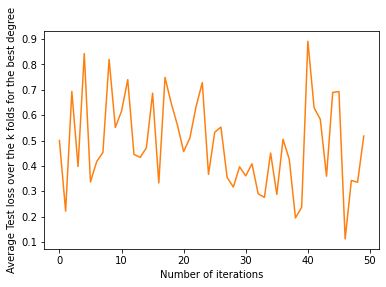

In [49]:
model = 'least_squares_SGD'
max_iters = 1000
batch_size = 1
params = {'max_iters':max_iters, 'batch_size':batch_size, 'plot':True}


accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

In [ ]:
print('Mean accuracy of best least squares gradient descent model: ', round(np.mean(accs_te),3))

Store values for comparison with other models later

In [50]:
np.save(f"best_models_perf/best_accs_{model}_{batch_size}", accs_te)

#### Higher batch size value
Preprocessing and parameters definition for optimization, here we change the batch_size to a higher value because maybe the used data point is an outlier

In [71]:
model = 'least_squares_SGD'
degrees = np.arange(1,7,1)
max_iters=1000
batch_size=256
plot=False
params={'max_iters':max_iters, 'batch_size':batch_size, 'plot':plot}

Parameters optimization

In [72]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params=params, seed = seed, feedback = True)

Optimizing degree 2/10, model: least_squares_SGD, arguments: {'max_iters': 50, 'batch_size': 250, 'plot': False}
Gradient Descent(0/49): loss=0.5, w0=-0.1, w1=0.1
Gradient Descent(1/49): loss=1.4815771865776055, w0=-0.0041359879877850975, w1=0.19958358037460092
Gradient Descent(2/49): loss=2.003325095524031, w0=-0.06710440421163451, w1=0.11589673375365546
Gradient Descent(3/49): loss=1.5355933789551859, w0=-0.01764338097087185, w1=0.13459254348773564
Gradient Descent(4/49): loss=1.350445961236439, w0=-0.040696186522480915, w1=0.06932503328063243
Gradient Descent(5/49): loss=1.055861539425594, w0=-0.014047808647443136, w1=0.13670898057433017
Gradient Descent(6/49): loss=0.8625514577800529, w0=-0.021278524366018715, w1=0.12397696732804095
Gradient Descent(7/49): loss=0.5260507156967577, w0=-0.010511556762773782, w1=0.11248512184751898
Gradient Descent(8/49): loss=0.47853687776518716, w0=-0.006836067719357376, w1=0.1059039834775013
Gradient Descent(9/49): loss=0.38788740063913135, w0=-0.0

Here we optimized over degrees only, so we plot degree vs accuracy

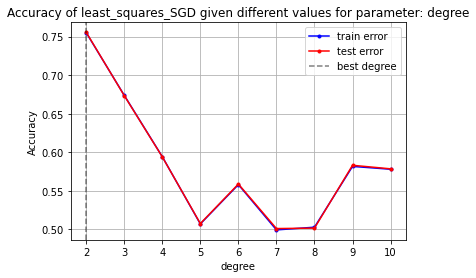

In [76]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = True, img_name = 'least_squares_SGD_accuracy')

Manually choose best parameters

In [77]:
best_degree = 2

Compute performance on k splits with best parameters

Starting cross-validation 1/4 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 50, 'batch_size': 250, 'plot': True}
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=0.01
Gradient Descent(20/49): loss =0.3354, w0=-0.0433, w1=0.0553
Gradient Descent(40/49): loss =0.3336, w0=-0.0489, w1=0.0631
Starting cross-validation 2/4 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 50, 'batch_size': 250, 'plot': True}
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=0.01
Gradient Descent(20/49): loss =0.3806, w0=-0.0433, w1=0.0485
Gradient Descent(40/49): loss =0.3668, w0=-0.0527, w1=0.0543
Starting cross-validation 3/4 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 50, 'batch_size': 250, 'plot': True}
Gradient Descent(0/49): loss =0.5, w0=-0.01, w1=0.01
Gradient Descent(20/49): loss =0.3492, w0=-0.0391, w1=0.0663
Gradient Descent(40/49): loss =0.3188, w0=-0.049, w1=0.0673
Starting cross-validation 4/4

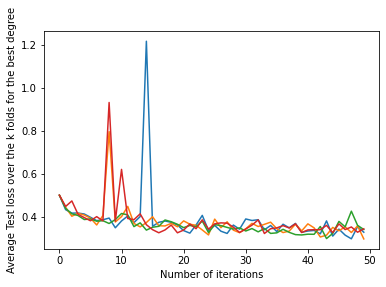

In [80]:
model = 'least_squares_SGD'
max_iters=1000
params = {'max_iters':max_iters, 'batch_size':batch_size, 'plot':True}


accs_te = []
for k in range(k_fold):
    _, loss_te, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

In [81]:
print('Mean accuracy of best least squares gradient descent model: ', round(np.mean(accs_te),3))

Mean accuracy of best least squares gradient descent model:  0.75
Mean loss of best least squares gradient descent model:  0.496


Store values for comparison with other models later

In [83]:
np.save(f"best_models_perf/best_accs_{model}_{batch_size}", accs_te)

# Ridge regression

Preprocessing and parameters definition for optimization

In [51]:
model = 'ridge_regression'
degrees = np.arange(1,15,1)
lambdas = np.logspace(-6,0,7)

Parameters optimization

In [34]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, lambdas, params = None, seed = seed, feedback = True)

Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 1e-06}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 1e-05}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.0001}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.001}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.01}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.1}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 1.0}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 1e-06}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 1e-05}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 0.0001}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 0.001}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 0.01}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda

Here we optimized over 2 parameters, so we use heatmap to visualize best combination

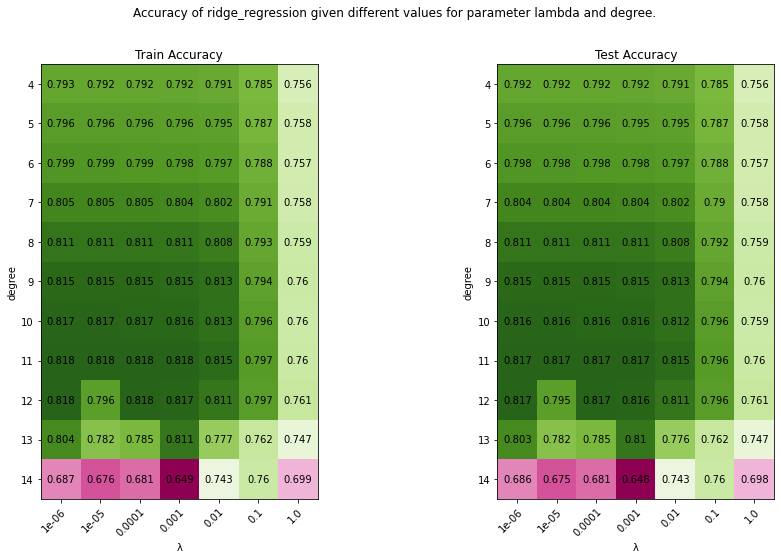

In [35]:
plot_heatmap(accs_tr, accs_te, degrees, lambdas, model, measure_type = 'Accuracy', save_img = True, img_name = 'Heatmap_accuracy_ridge_regression')

Manually choose best parameters

In [52]:
best_lambda = 1e-6
best_degree = 10

Compute performance on k splits with best parameters

In [53]:
model = 'ridge_regression'
params = {'lambda' : best_lambda}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/2 for ridge_regression, extended feature of degree 5 and arguments : {'lambda': 1e-06}
Starting cross-validation 2/2 for ridge_regression, extended feature of degree 5 and arguments : {'lambda': 1e-06}


In [38]:
print('Mean accuracy of best ridge regression model: ', round(np.mean(accs_te),3))

Mean accuracy of best ridge regression model:  0.816


Store values for comparison with other models later

In [54]:
np.save('best_models_perf/best_accs_' + model, accs_te)

## Logistic regression

Preprocessing and parameters definition for optimization

In [55]:
model = 'logistic_regression'
degrees = np.arange(1,10,1)
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

Parameters optimization

In [6]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params = params, params_logistic = params_logistic, seed = seed, feedback = True)

Optimizing degree 1/5, model: logistic_regression, arguments: {'max_iters': 100, 'gamma': 0.1}
[[63677.26586106]] [[63699.90352456]] 0.742736 0.742768
[[63727.35695726]] [[63750.47203174]] 0.74288 0.743032
Optimizing degree 2/5, model: logistic_regression, arguments: {'max_iters': 100, 'gamma': 0.1}
[[54312.49909886]] [[54168.38689022]] 0.801336 0.802552
[[54251.20928456]] [[54410.48069476]] 0.801024 0.799768
Optimizing degree 3/5, model: logistic_regression, arguments: {'max_iters': 100, 'gamma': 0.1}
[[54593.10415674]] [[54518.42775687]] 0.797824 0.797696
[[54605.02085721]] [[54743.27647796]] 0.800416 0.79976
Optimizing degree 4/5, model: logistic_regression, arguments: {'max_iters': 100, 'gamma': 0.1}
[[55426.66698099]] [[55280.69151341]] 0.796216 0.796272
[[55832.17682225]] [[55983.06155802]] 0.79384 0.794448
Optimizing degree 5/5, model: logistic_regression, arguments: {'max_iters': 100, 'gamma': 0.1}
[[60166.39759688]] [[59924.13445155]] 0.791336 0.793072
[[57411.60773617]] [[577

Here we optimized over degrees only, so we plot degree vs accuracy

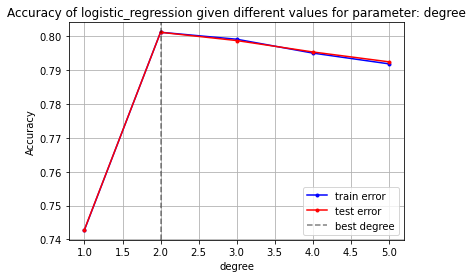

In [7]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = True, img_name = 'logistic_regression_accuracy')

Manually choose best parameters

In [56]:
best_degree = 2

Compute performance on k splits with best parameters

In [57]:
model = 'logistic_regression'
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, params_logistic = params_logistic, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/2 for logistic_regression, extended feature of degree 2 and arguments : {'max_iters': 1000, 'gamma': 0.1}
Starting cross-validation 2/2 for logistic_regression, extended feature of degree 2 and arguments : {'max_iters': 1000, 'gamma': 0.1}


In [10]:
print('Mean accuracy of best logistic regression model: ', round(np.mean(accs_te),3))

Mean accuracy of best logistic regression model:  0.807


Store values for comparison with other models later

In [58]:
np.save(f'best_models_perf/best_accs_{model}_{batch_size}', accs_te)

## Regularized Logistic regression

Preprocessing and parameters definition for optimization

In [59]:
model = 'reg_logistic_regression'
degrees = np.arange(1,5,1)
lambdas = np.logspace(-6,0,7)
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

Parameters optimization

In [13]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, lambdas, params = params, params_logistic = params_logistic, seed = seed, feedback = True)

Optimizing degree 1/4, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-06}
[[63510.57916644]] [[63542.45802766]] 0.74568 0.744824
[[63446.32751971]] [[63468.97234546]] 0.745064 0.745456
Optimizing degree 1/4, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-05}
[[63479.55387905]] [[63502.69837173]] 0.745112 0.744328
[[63461.00062354]] [[63480.49202491]] 0.743768 0.744224
Optimizing degree 1/4, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
[[63482.61891883]] [[63509.77228586]] 0.743568 0.743184
[[63478.66217948]] [[63507.96506217]] 0.744088 0.744144
Optimizing degree 1/4, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.001}
[[63462.70068478]] [[63488.12468766]] 0.744776 0.743608
[[63472.37735055]] [[63488.32616064]] 0.743992 0.744912
Optimizing degree 1/4, model: reg_logistic_regression, arguments: {'max_iters': 1000

Here we optimized over degrees only, so we plot degree vs accuracy

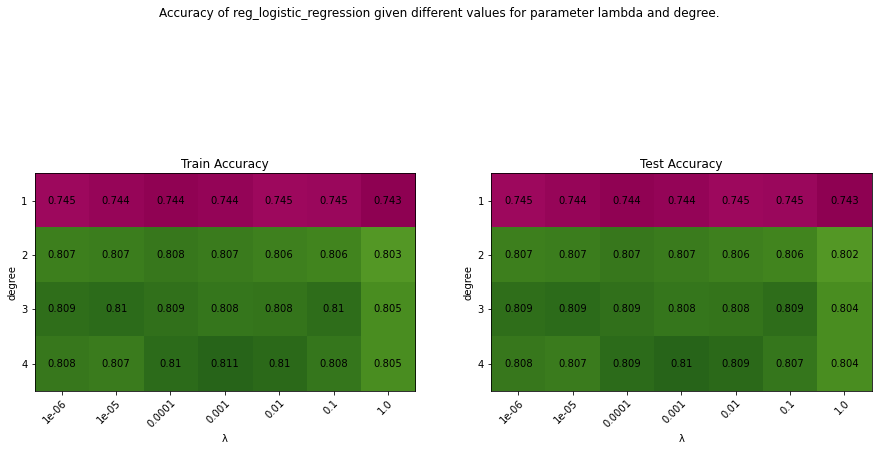

In [14]:
plot_heatmap(accs_tr, accs_te, degrees, lambdas, model, measure_type = 'Accuracy', save_img = True, img_name = 'Heatmap_accuracy_reg_log_regression')

Manually choose best parameters

In [60]:
best_degree = 4
best_lambda = 1e-3

Compute performance on k splits with best parameters

In [61]:
model = 'reg_logistic_regression'
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma, 'lambda' : best_lambda}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

accs_te = []
losses_te = []
for k in range(k_fold):
    _, loss_te, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)
    losses_te.append(loss_te)

Starting cross-validation 1/2 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.001}
Starting cross-validation 2/2 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.001}


In [19]:
print('Mean accuracy of best regularized logistic regression model: ', round(np.mean(accs_te),3))

Mean accuracy of best regularized logistic regression model:  0.691


Store values for comparison with other models later

In [62]:
np.save(f'best_models_perf/best_accs_{model}_{batch_size}', accs_te)

# Boxplots and variance of best models

In [69]:
in_ = 'best_models_perf/best_accs_'
accs_ls_GD = np.load(f'{in_}least_squares_GD.npy')
accs_ls_SGD_1 = np.load(f'{in_}least_squares_SGD_1.npy')
accs_ls_SGD_256 = np.load(f'{in_}least_squares_SGD_256.npy')
accs_ls = np.load(f'{in_}least_squares.npy')
accs_ridge = np.load(f'{in_}ridge_regression.npy')
accs_log = np.load(f'{in_}logistic_regression_256.npy')
accs_reg_log = np.load(f'{in_}reg_logistic_regression_256.npy')

In [70]:
accuracies = np.array([accs_ls_GD, accs_ls_SGD_1, accs_ls_SGD_256, accs_ls, accs_ridge, accs_log, accs_reg_log])
stds = np.std(accuracies, axis = 1)
means = np.mean(accuracies, axis = 1)
model_names = np.array(['Least squares GD','Least squares SGD_1', 'Least squares SGD_256', 'Least squares','Ridge regression','Logistic regression_256','Reg logistic regression_256'])

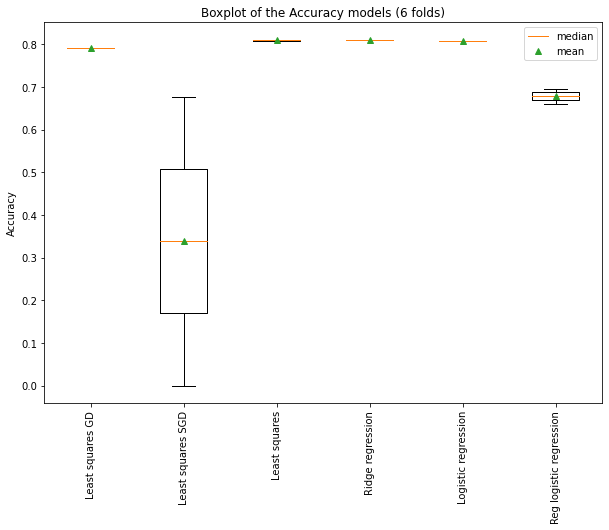

Least squares GD: mean = 0.7916, std = 0.0
Least squares SGD: mean = 0.3387, std = 0.3387
Least squares: mean = 0.8088, std = 0.0003
Ridge regression: mean = 0.8104, std = 0.0002
Logistic regression: mean = 0.8071, std = 0.0006
Reg logistic regression: mean = 0.6783, std = 0.0176


In [76]:
plot_boxplots(accuracies, model_names, err_type = 'Accuracy', save_img = True, img_name = 'Boxplots of best models')
for i, model in enumerate(model_names):
    print(f'{model}: mean = {round(means[i],4)}, std = {round(stds[i],4)}')

## Data visualization with predictions: <br>true/false positive/negative

Features visualization (preprocessed dataset with predictions)


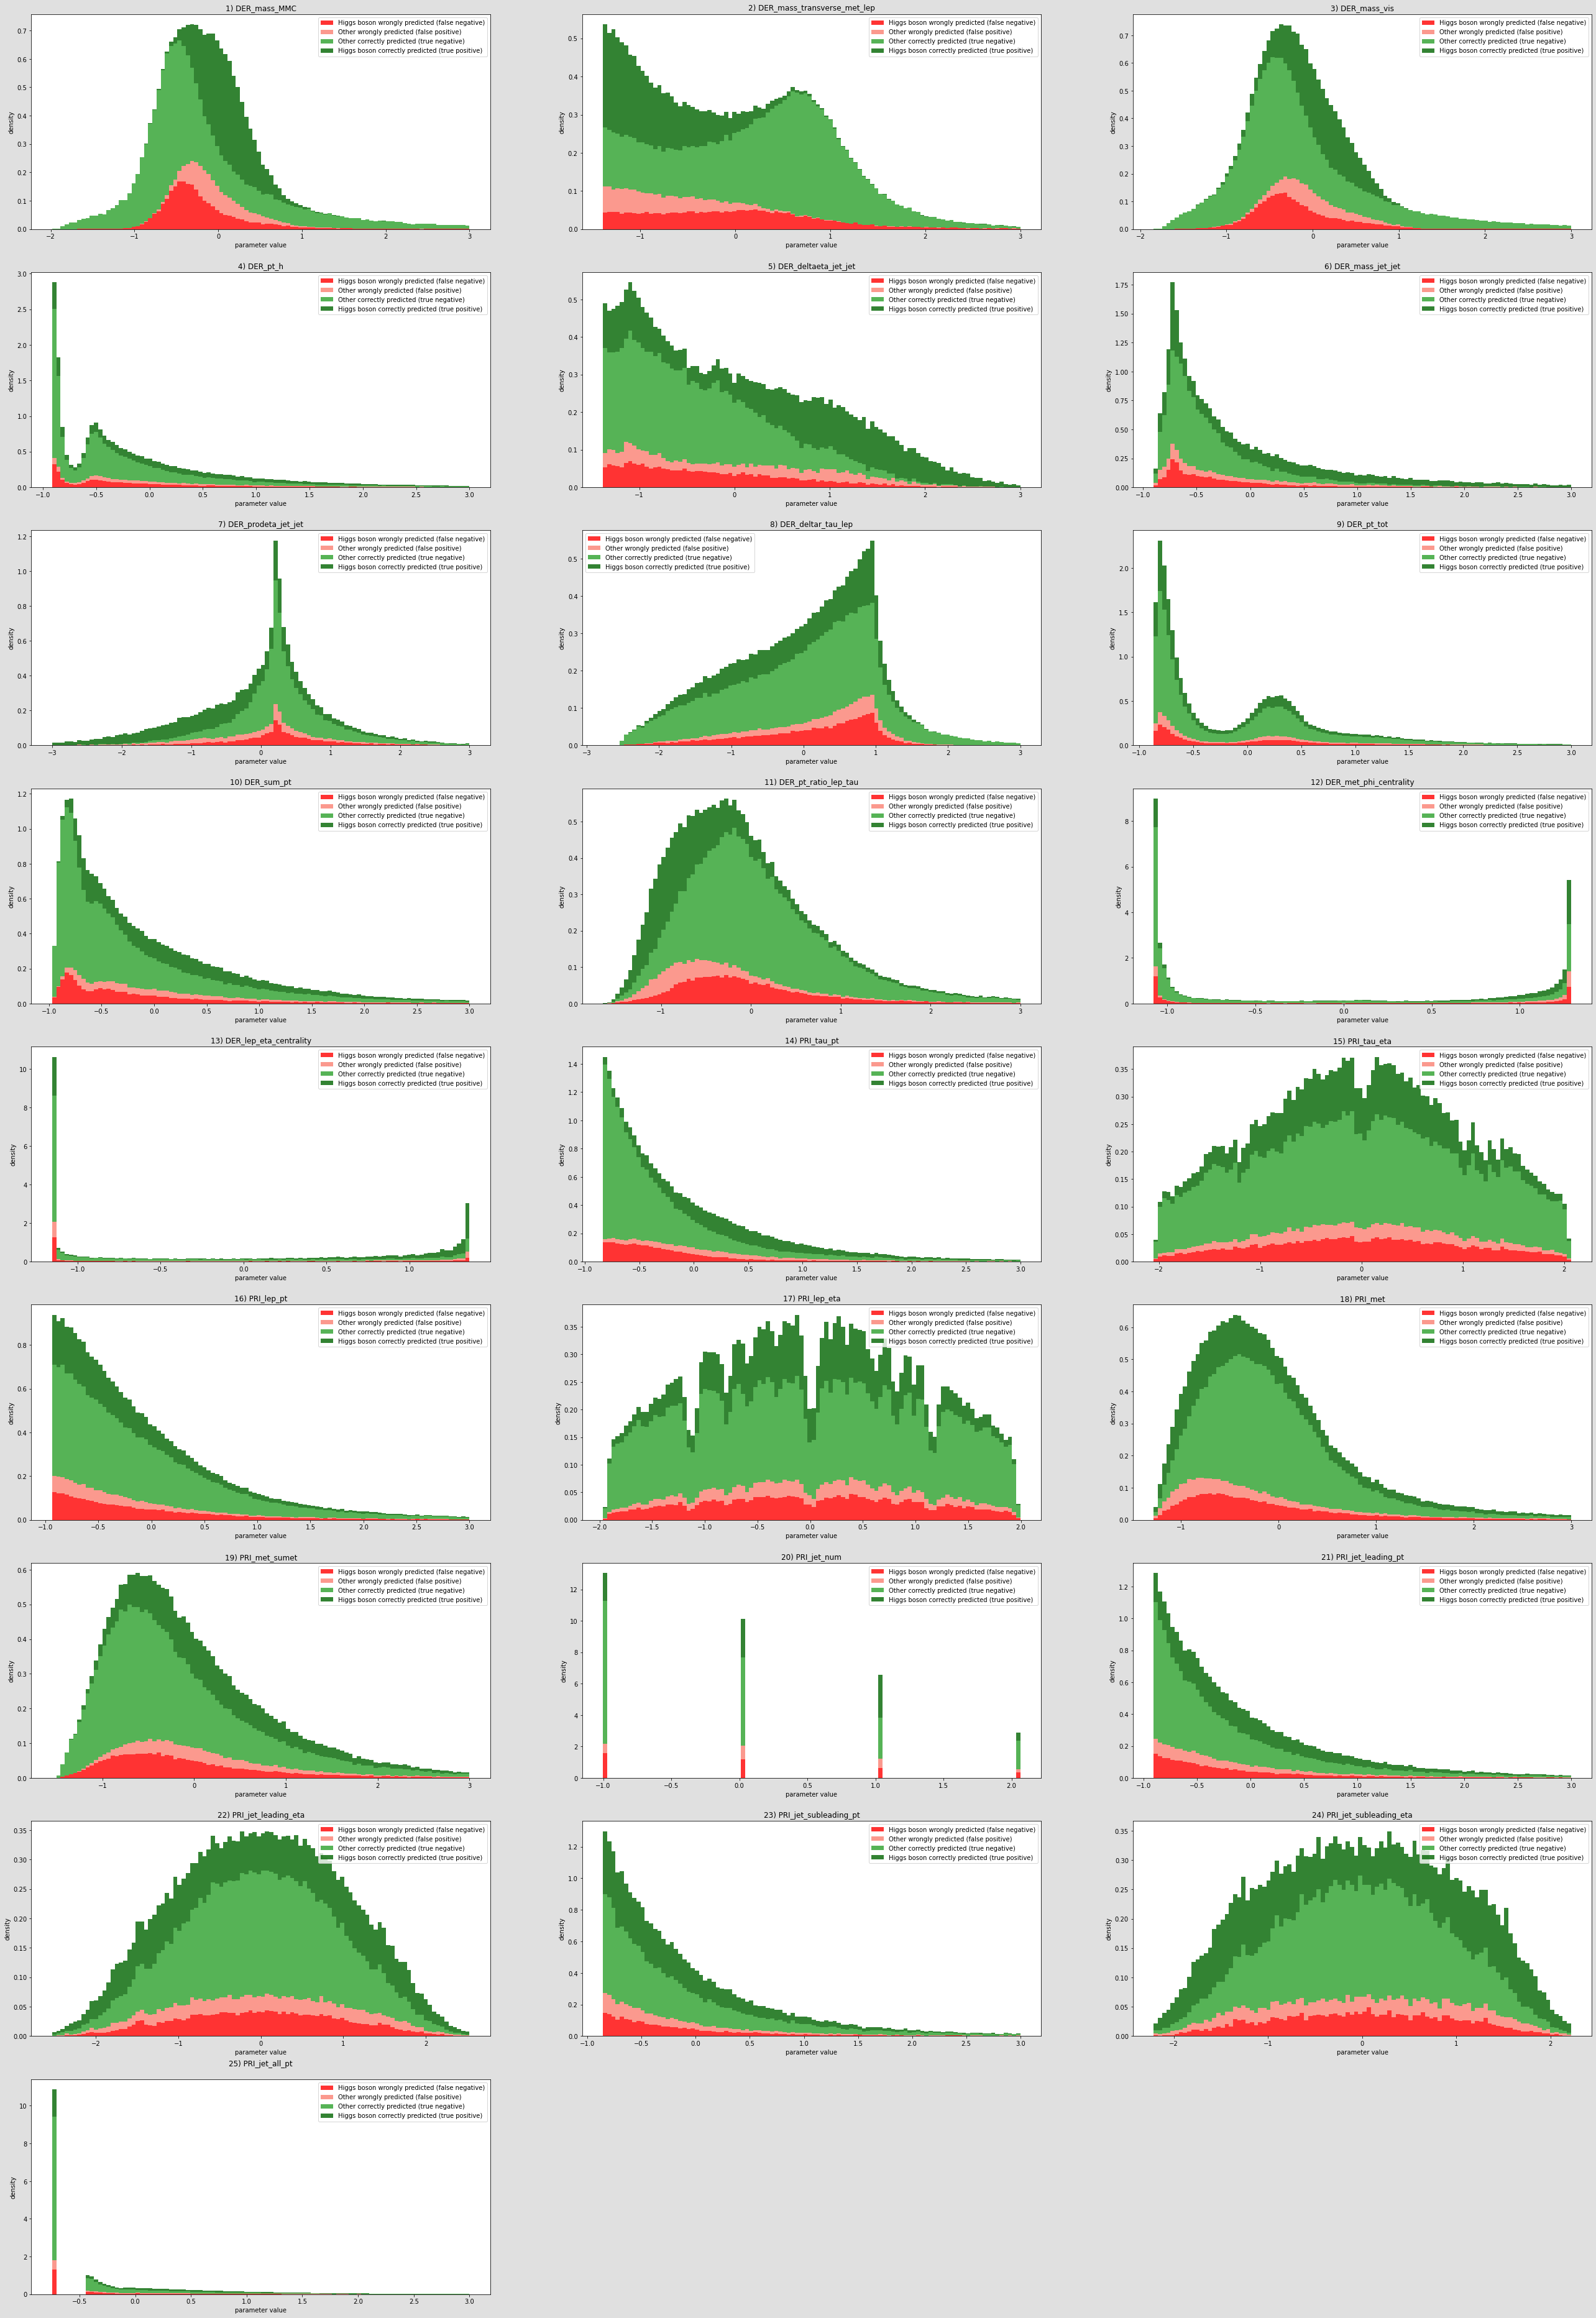

0

In [37]:
y_dv2, tX_dv2, _, _, _ = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Degree_poly': 9})
w_dv, _ = ridge_regression(y_dv2, tX_dv2, 0.0001)
y_pred_dv = predict_labels(w_dv.reshape(-1,1), tX_dv2)

print("Features visualization (preprocessed dataset with predictions)")
plot_features_visualization(y_dv1, tX_dv1[:,1:], y_pred_dv, names=param_names_dv)


## Mean of models predictions ?

## Generate predictions and save ouput in csv format for submission:

Ridge trial submission

Model creation and test_data preprocessing

In [13]:
y_tr, tX_tr, ids_tr, tX_te, ids_te = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Build_poly': True, 'Degree_poly' : 10})
best_lambda = 1e-6
weights, loss = ridge_regression(y_tr, tX_tr, best_lambda)

In [15]:
OUTPUT_PATH = 'submissions/ridge_poly10_1e-6' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_te)
create_csv_submission(ids_te, y_pred, OUTPUT_PATH)